# **YOLOv8 model**

Install libraries and import

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Import dataset from Roboflow

In [ ]:
!pip install roboflow==1.1.48 --quiet

import roboflow

roboflow.login()

from roboflow import Roboflow
rf = Roboflow(api_key="hrBUUZBmlpIg1PWziWzX")
project = rf.workspace("segmentation-etub2").project("final-fire-dataset")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.1 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to final-fire-dataset-2 in yolov8:: 100%|██████████| 7180/7180 [00:01<00:00, 7085.85it/s]


Train YOLOv8 model with 25 epochs

In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=25 imgsz=320

100% 22.8M/22.8M [00:00<00:00, 45.4MB/s]
New https://pypi.org/project/ultralytics/8.3.138 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/final-fire-dataset-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, clas

Predict images

In [ ]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt source="/content/final-fire-dataset-2/test/images/1200px-Burning_wood_jpg.rf.4dfa99ab605afdf48d9f1599056994e3.jpg"

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,781,535 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/final-fire-dataset-2/test/images/1200px-Burning_wood_jpg.rf.4dfa99ab605afdf48d9f1599056994e3.jpg: 320x320 1 Class A, 10.7ms
Speed: 1.1ms preprocess, 10.7ms inference, 163.3ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


Visualize an image

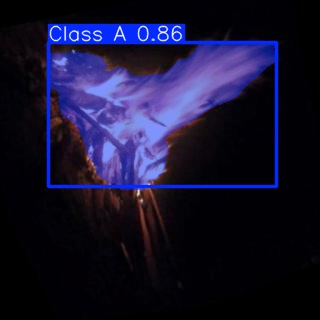

In [ ]:
Image(filename='/content/runs/segment/predict/1200px-Burning_wood_jpg.rf.4dfa99ab605afdf48d9f1599056994e3.jpg')

Save best model for YOLOv8

In [ ]:
!cp runs/segment/train/weights/best.pt best_yolov8_model_segmentation.pt